# Visualizing the Stock Market forecasting and classification using LSTM and  RNN

Understanding why do Stock Markets Exist:
A stock market is a public market where people can buy and sell shares on the stock exchange. The stocks, also known as equities, represent ownership in the company.
The oldest stock exchange was started in Belgium back in 1531. The brokers and moneylenders used to meet there to deal with the businesses. However, they never used actual stocks but traded in promissory notes and bonds.



# Why do stock markets exist?
— Stock market helps companies raise capital
— Stock market helps create personal wealth
— It helps increase investment in the economy
— Market serves as an indicator of the state of the economy

Stock price prediction plays a crucial role in financial markets, and accurate forecasts can have significant 
implications for businesses, investors, and financial institutions.
Machine and Deep Learning have demonstrated their potential to enhance stock price prediction accuracy and assist investors,
traders, and financial analysts in making informed decisions. By leveraging ML techniques, businesses can gain valuable
insights, optimize investment strategies, and improve risk management in stock market's complex and dynamic realm.

The prediction of stock prices is a challenging task due to the inherent complexity and volatility of financial markets.
Traditional methods often fail to capture the intricate patterns and dependencies present in stock price data. 
However, RNN and LSTM models have shown great potential in capturing temporal dependencies and making accurate predictions 
in various time series forecasting tasks.



# Role of Machine Learning and Deeplearning in Stock Markets


Machine learning and deep learning powerful tool for stock market prediction
Shares listed on the stock market can be bought for both short-term and long-term term investment strategies
Forecasting stock prices and predicting market trends can be challenging tasks.Machine learning and deep learning, 
time series forecasting and ensemble algorithms are some popular approaches to solving mentioned problems.
Stock forecasting using LSTM and RNN overcomes long term dependency.
Stock Market forecasting is regression use case

In this first project of our four-part series, we will focus on implementing recurrent neural networks (RNNs) and long short-term memory (LSTM) networks specifically for the task of stock price prediction.
This project serves as an essential foundation for understanding and utilizing these advanced deep learning techniques 
in the context of financial forecasting.

Throughout this project, we will delve into the fundamentals of RNNs and LSTMs and explore their suitability 
for capturing temporal dependencies in stock price data. We will learn how to preprocess and prepare the historical 
stock price dataset for training and testing our models.







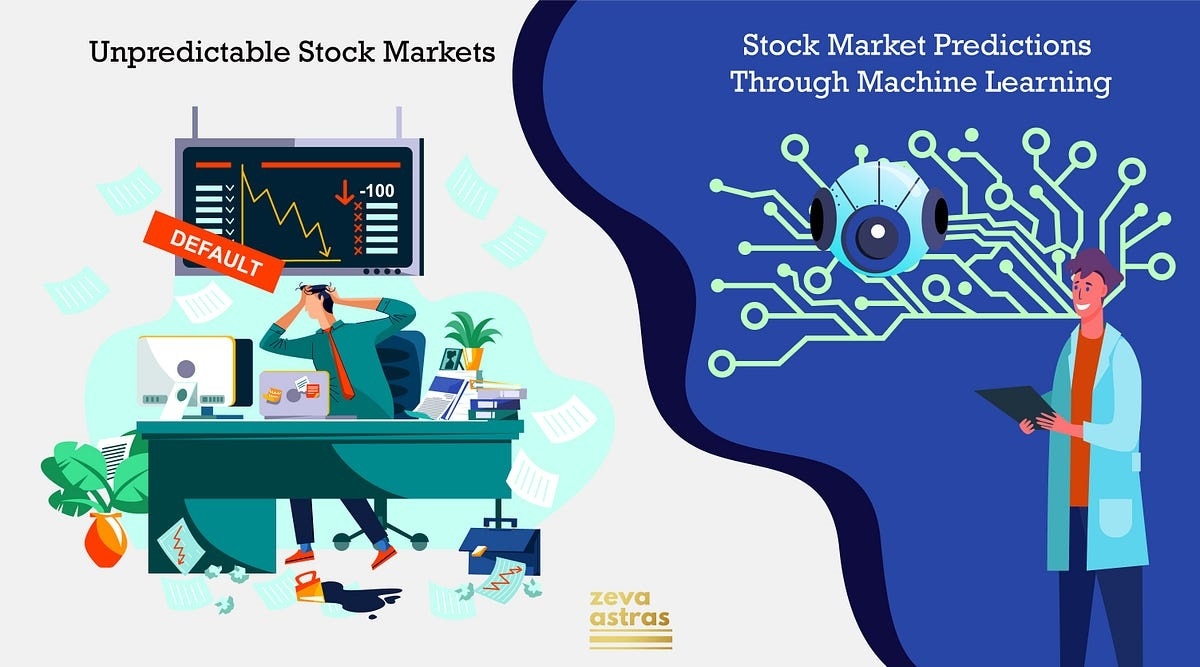

In [1]:


#  ignore warnings
import warnings
warnings.filterwarnings('ignore')
'''!pip install tensorflow==2.12.0
!pip install statsmodels==0.14.0
!pip install numpy==1.23.5
!pip install scikit-learn==1.2.2
!pip install seaborn==0.12.2
!pip install matplotlib==3.7.1
!pip install pandas==2.0.2
!pip install yfinance==0.2.18
!pip install pandas_datareader==0.10.0
!pip install pandas_ta==0.3.14b
!pip install projectpro'''
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import yfinance as yf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import pandas_ta as ta
from projectpro import model_snapshot, checkpoint
from keras.layers import LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
yf.pdr_override()
%matplotlib inline

In [2]:
abalone_features = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", 
                    "Viscera weight", "Shell weight", "Age"]

In [27]:
abalone_train = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=abalone_features)

abalone_test = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_test.csv",
    names=abalone_features)checkpoint('34db30')
abalone_train.head()



SyntaxError: invalid syntax (1889718478.py, line 6)

# Plotting training and test data

In [29]:
tstart = 2016
tend = 2020

In [30]:
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Apple stock price")
    plt.show()

In [31]:
train_test_plot(dataset, tstart, tend)

NameError: name 'dataset' is not defined

#### Scaling Dataset values

In [25]:
def train_test_split(dataset, tstart, tend, columns = ['High']):
    train = dataset.loc[f"{tstart}":f"{tend}", columns].values
    test = dataset.loc[f"{tend+1}":, columns].values
    return train, test

In [32]:
training_set, test_set = train_test_split(dataset, tstart, tend)

NameError: name 'dataset' is not defined

In [33]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

NameError: name 'training_set' is not defined

In [12]:
n_steps = 1
features = 1
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
X_train, y_train = split_sequence(training_set_scaled, n_steps)



NameError: name 'training_set_scaled' is not defined

#### Reshaping of X train for Model


In [1]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

NameError: name 'X_train' is not defined

#### Evaluation

In [ ]:
def plot_predictions(test, predicted, title):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title(f'{title}')
    plt.xlabel("Time")
    plt.ylabel(f'{title}')
    plt.legend()
    plt.show()

In [ ]:
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

#### Vanilla RNN

In [17]:
def plot_loss(history):
    plt.figure(figsize = (15,10))
    plt.plot(history.history['loss'], label='loss')
    plt.legend(loc='best')
    plt.show()

In [18]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=125, input_shape=(n_steps, features)))
model_rnn.add(Dense(units=1))



NameError: name 'Sequential' is not defined

In [19]:
model_rnn.compile(optimizer="RMSprop", loss="mse")

NameError: name 'model_rnn' is not defined

In [1]:

history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
model_snapshot("34db30")
plot_loss(history)

NameError: name 'model_rnn' is not defined